In [8]:
import pandas as pd 
import plotly.graph_objects as go 
import plotly.offline as pyoff 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [9]:
data=pd.read_csv("KNN_CellClassification.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [10]:
data.head() 


,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [11]:
data.columns=['Id','Clump Thickness','uniformity of cell size','uniformity of cell shape','Marginal Adhesion','Single Epithelial cell size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

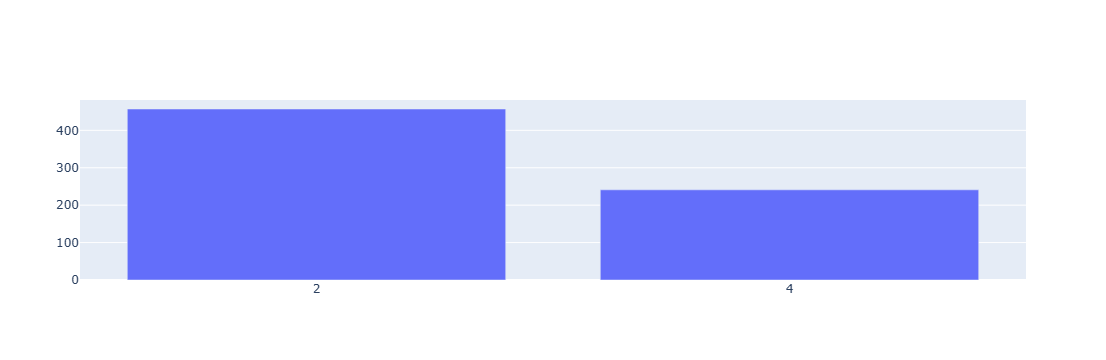

In [12]:
target_balance=data['Class'].value_counts().reset_index() 
target_balance.columns=['Class','Count'] 
target_class=go.Bar( 
    name="Target Balance", 
    x=target_balance['Class'].astype(str), 
    y=target_balance['Count'] 
    ) 
fig=go.Figure(target_class) 
pyoff.iplot(fig)

In [13]:
beg_class_pat=data.loc[data['Class']==2] 
mal_class_pat=data.loc[data['Class']==4] 
Mith_10_beg=beg_class_pat['Mitoses'].value_counts().reset_index() 
Mith_10_beg.columns=['Mitoses','Count'] 
Mith_10_mal=mal_class_pat['Mitoses'].value_counts().reset_index() 
Mith_10_mal.columns=['Mitoses','Count'] 

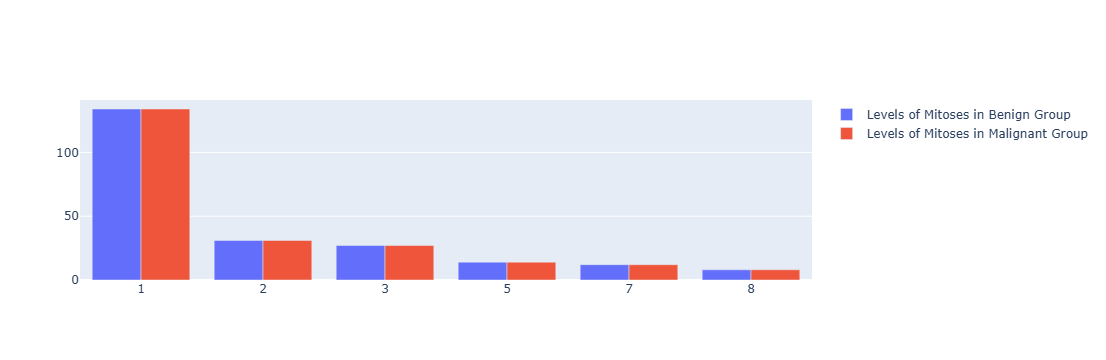

In [15]:
fig=go.Figure(data=[ 
    go.Bar(name='Levels of Mitoses in Benign Group',x=Mith_10_beg['Mitoses'].astype(str),y=Mith_10_mal['Count']), 
    go.Bar(name='Levels of Mitoses in Malignant Group',x=Mith_10_beg['Mitoses'].astype(str),y=Mith_10_mal['Count'])]) 
fig.update_layout(barmode='group') 
fig.show()

In [16]:
x=data.drop(columns=['Id','Class']) 
y=data['Class']

In [17]:
print("Unique Values in 'Bara Nuclei':",x['Bare Nuclei'].unique()) 


Unique Values in 'Bara Nuclei': ['10' '2' '4' '1' '3' '9' '7' '?' '5' '8' '6']


In [18]:
x['Bare Nuclei']=pd.to_numeric(x['Bare Nuclei'],errors='coerce') 


In [19]:
x=x.fillna(x.median())  


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
scaler=StandardScaler() 
x_train_scaled=scaler.fit_transform(x_train) 
x_test_scaled=scaler.transform(x_test)

In [22]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train_scaled,y_train) 

KNeighborsClassifier()

In [23]:
y_pred=knn.predict(x_test_scaled) 


In [24]:
print("Accuracy: ",accuracy_score(y_test,y_pred)) 
print() 
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred)) 
print("Classification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9714285714285714

Confusion Matrix: 
 [[131   4]
 [  2  73]]
Classification Report: 
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       135
           4       0.95      0.97      0.96        75

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

